In [495]:
from mcrcon import MCRcon
import time

from redstone import RedstoneFactory

PLAYER_NAME = "luca"

def load_and_paste():
    with MCRcon(host="localhost", password="test") as mcrcon:
        mcrcon.command("sudo luca /undo")
        mcrcon.command("sudo luca /schem load devschematics/testt")
        mcrcon.command("sudo luca /paste -a")


In [498]:
import importlib
from redstone import RedstoneFactory, AmuletSchematic
from yosys_parser import parse_yosys_json
from Optimizer import Optimizer

In [499]:
factory = RedstoneFactory()

nodes = parse_yosys_json("counter.json", factory)
optimizer = Optimizer(factory, bounds=(70, 70),startT=30000,endT=0.01,cooling_rate=0.995)

Parsing module: counter
  Port Input clk (Net 2) -> Node 0
  Port Input rst (Net 3) -> Node 1
Linking graph...
Successfully created 27 components and 42 connections.


In [500]:
optimizer.run(steps=50000)


Starting SA. Initial Energy: 909047
  >>> New Best at Step 0: 891047
Step 0/50000 | Temp: 30000.00 | Current: 891047 | Best: 891047
  >>> New Best at Step 1: 886047
  >>> New Best at Step 2: 876249
  >>> New Best at Step 6: 859333
  >>> New Best at Step 8: 854749
  >>> New Best at Step 9: 800951
  >>> New Best at Step 11: 789951
  >>> New Best at Step 12: 768955
  >>> New Best at Step 13: 700549
  >>> New Best at Step 14: 698549
  >>> New Best at Step 15: 643485
  >>> New Best at Step 22: 637023
  >>> New Best at Step 23: 634023
  >>> New Best at Step 24: 596885
  >>> New Best at Step 25: 529203
  >>> New Best at Step 31: 514491
  >>> New Best at Step 33: 514467
  >>> New Best at Step 34: 509545
  >>> New Best at Step 35: 506551
  >>> New Best at Step 36: 505551
  >>> New Best at Step 38: 501551
  >>> New Best at Step 39: 496551
  >>> New Best at Step 40: 488551
  >>> New Best at Step 41: 461547
  >>> New Best at Step 42: 458553
  >>> New Best at Step 46: 421569
  >>> New Best at Step 

134646

In [501]:
schematic = AmuletSchematic()
factory.compile_to_schematic(schematic)

Compiling 27 components...
Generating Solid Foundation...
Initializing High-Rise Physics Router...
Routing Complete. Success: 42, Failed: 0


In [502]:
schematic.save("devschematics", "tedx")

INFO - Saving changes to level devschematics/tedx.schematic
INFO - Finished saving changes to level devschematics/tedx.schematic


Saved to: devschematics/tedx.schematic


In [433]:
import multiprocessing
import traceback
import random
# Ensure these are saved in .py files next to your notebook

# --- ROBUST WORKER FUNCTION ---
def run_optimization_safe(seed):
    """
    Wrapper that catches exceptions and returns them as data.
    """
    try:
        # 1. Setup
        random.seed(seed)
        factory = RedstoneFactory()

        # Ensure counter.json exists or pass absolute path
        nodes = parse_yosys_json("counter.json", factory)
        if not nodes:
            return None, 0, "Parser returned 0 nodes"

        # 2. Run
        # Using fewer steps for testing validity first
        opt = Optimizer(factory, bounds=(100, 100), startT=5000, endT=0.1)
        best_score = opt.run(steps=2000)

        return factory, best_score, "OK"

    except Exception:
        # Capture the full crash report
        error_msg = traceback.format_exc()
        return None, float('inf'), error_msg

# --- MAIN EXECUTION ---
if __name__ == "__main__":
    NUM_CHAINS = multiprocessing.cpu_count()
    print(f"Launching {NUM_CHAINS} parallel optimization chains...")

    with multiprocessing.Pool(NUM_CHAINS) as pool:
        # Map returns a list of tuples: [(factory, score, status), ...]
        raw_results = pool.map(run_optimization_safe, range(NUM_CHAINS))

    # 1. SEPARATE SUCCESSES FROM FAILURES
    successes = []
    failures = []

    for res in raw_results:
        if res and res[2] == "OK":
            successes.append(res)
        else:
            failures.append(res)

    # 2. REPORT ERRORS IF ANY
    if failures:
        print(f"\nWarning: {len(failures)} chains failed.")
        print("Sample Error from first failure:")
        # Print the traceback captured inside the worker
        print(failures[0][2])

    # 3. PROCESS WINNER
    if successes:
        # Find minimum score (index 1 is score)
        best_factory, best_score, _ = min(successes, key=lambda x: x[1])

        print(f"\nWinner Energy: {best_score}")

        schem = AmuletSchematic()
        best_factory.compile_to_schematic(schem)
        schem.save("devschematics", "final")
        print("Saved successfully.")
    else:
        print("\nCRITICAL: All chains failed. See error message above.")

Launching 12 parallel optimization chains...
Parsing module: counterParsing module: counterParsing module: counterParsing module: counterParsing module: counterParsing module: counterParsing module: counterParsing module: counterParsing module: counter
Parsing module: counterParsing module: counter


Parsing module: counter




  Port Input clk (Net 2) -> Node 0

  Port Input clk (Net 2) -> Node 0  Port Input clk (Net 2) -> Node 0  Port Input clk (Net 2) -> Node 0  Port Input clk (Net 2) -> Node 0  Port Input clk (Net 2) -> Node 0  Port Input clk (Net 2) -> Node 0
  Port Input clk (Net 2) -> Node 0  Port Input clk (Net 2) -> Node 0


  Port Input clk (Net 2) -> Node 0
  Port Input clk (Net 2) -> Node 0


  Port Input rst (Net 3) -> Node 1

  Port Input rst (Net 3) -> Node 1  Port Input rst (Net 3) -> Node 1  Port Input rst (Net 3) -> Node 1  Port Input rst (Net 3) -> Node 1  Port Input rst (Net 3) -> Node 1  Port Input clk (Net 2) -> Node 0

  Port Input rst (Net 3) -> Node 1  Port Inp

TypeError: cannot unpack non-iterable int object

In [433]:
import multiprocessing
import traceback
import random
# Ensure these are saved in .py files next to your notebook

# --- ROBUST WORKER FUNCTION ---
def run_optimization_safe(seed):
    """
    Wrapper that catches exceptions and returns them as data.
    """
    try:
        # 1. Setup
        random.seed(seed)
        factory = RedstoneFactory()

        # Ensure counter.json exists or pass absolute path
        nodes = parse_yosys_json("counter.json", factory)
        if not nodes:
            return None, 0, "Parser returned 0 nodes"

        # 2. Run
        # Using fewer steps for testing validity first
        opt = Optimizer(factory, bounds=(100, 100), startT=5000, endT=0.1)
        best_score = opt.run(steps=2000)

        return factory, best_score, "OK"

    except Exception:
        # Capture the full crash report
        error_msg = traceback.format_exc()
        return None, float('inf'), error_msg

# --- MAIN EXECUTION ---
if __name__ == "__main__":
    NUM_CHAINS = multiprocessing.cpu_count()
    print(f"Launching {NUM_CHAINS} parallel optimization chains...")

    with multiprocessing.Pool(NUM_CHAINS) as pool:
        # Map returns a list of tuples: [(factory, score, status), ...]
        raw_results = pool.map(run_optimization_safe, range(NUM_CHAINS))

    # 1. SEPARATE SUCCESSES FROM FAILURES
    successes = []
    failures = []

    for res in raw_results:
        if res and res[2] == "OK":
            successes.append(res)
        else:
            failures.append(res)

    # 2. REPORT ERRORS IF ANY
    if failures:
        print(f"\nWarning: {len(failures)} chains failed.")
        print("Sample Error from first failure:")
        # Print the traceback captured inside the worker
        print(failures[0][2])

    # 3. PROCESS WINNER
    if successes:
        # Find minimum score (index 1 is score)
        best_factory, best_score, _ = min(successes, key=lambda x: x[1])

        print(f"\nWinner Energy: {best_score}")

        schem = AmuletSchematic()
        best_factory.compile_to_schematic(schem)
        schem.save("devschematics", "final")
        print("Saved successfully.")
    else:
        print("\nCRITICAL: All chains failed. See error message above.")

Launching 12 parallel optimization chains...
Parsing module: counterParsing module: counterParsing module: counterParsing module: counterParsing module: counterParsing module: counterParsing module: counterParsing module: counterParsing module: counter
Parsing module: counterParsing module: counter


Parsing module: counter




  Port Input clk (Net 2) -> Node 0

  Port Input clk (Net 2) -> Node 0  Port Input clk (Net 2) -> Node 0  Port Input clk (Net 2) -> Node 0  Port Input clk (Net 2) -> Node 0  Port Input clk (Net 2) -> Node 0  Port Input clk (Net 2) -> Node 0
  Port Input clk (Net 2) -> Node 0  Port Input clk (Net 2) -> Node 0


  Port Input clk (Net 2) -> Node 0
  Port Input clk (Net 2) -> Node 0


  Port Input rst (Net 3) -> Node 1

  Port Input rst (Net 3) -> Node 1  Port Input rst (Net 3) -> Node 1  Port Input rst (Net 3) -> Node 1  Port Input rst (Net 3) -> Node 1  Port Input rst (Net 3) -> Node 1  Port Input clk (Net 2) -> Node 0

  Port Input rst (Net 3) -> Node 1  Port Inp

TypeError: cannot unpack non-iterable int object

In [444]:
print(f"Total Nodes: {len(factory.graph.nodes)}")

node_counts = {}
for node in factory.graph.nodes:
    type_name = node.type
    node_counts[type_name] = node_counts.get(type_name, 0) + 1

    # If we find a WIRE or INPUT, print its location
    if type_name in ["WIRE", "INPUT"]:
        print(f"Found {type_name} at {node.pos}")

print("\n--- Node Type Counts ---")
print(node_counts)

Total Nodes: 27
Found INPUT at (24, 4, 18)
Found INPUT at (188, 4, 84)

--- Node Type Counts ---
{'INPUT': 2, 'NOT': 8, 'NOR': 13, 'DFF': 4}


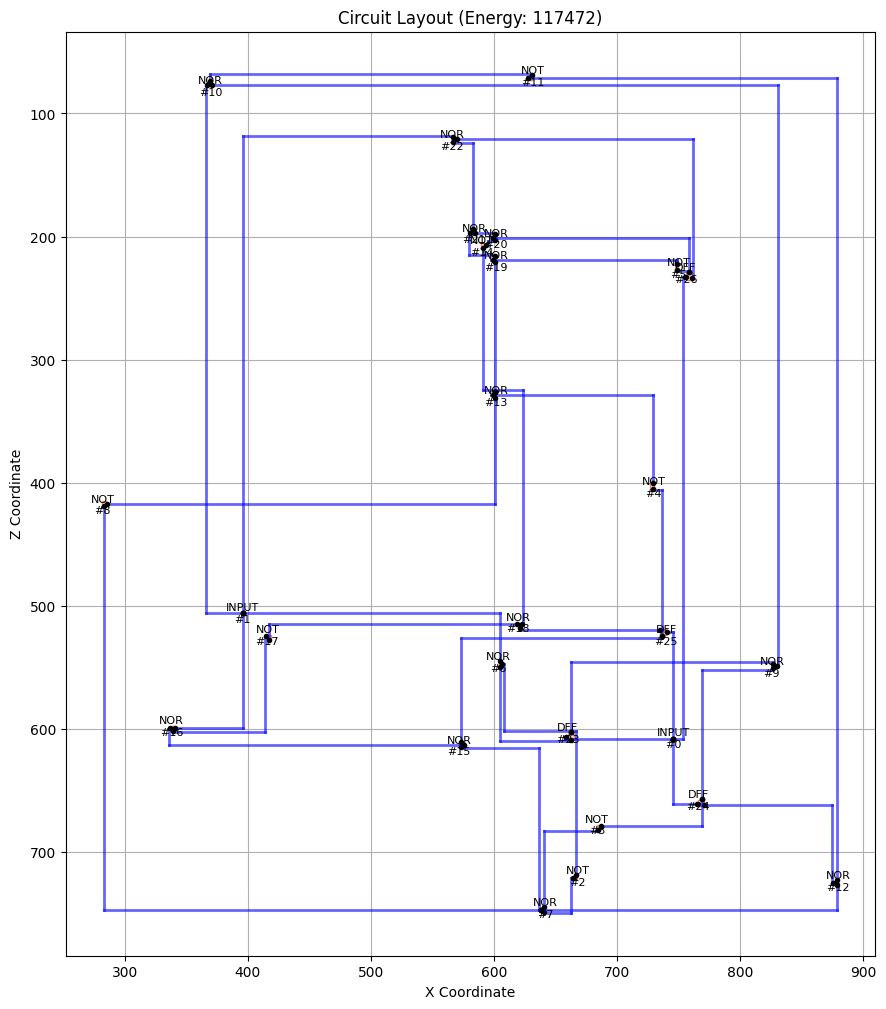

In [385]:
visualize_circuit(factory.graph)

In [418]:
load_and_paste()